In [1]:
import evaluation 
import importlib
importlib.reload(evaluation)

<module 'evaluation' from '/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py'>

In [2]:
from shallow_models.shallow_ensembles import RegressionEnsemble as ShallowEnsemble
import shallow_models
importlib.reload(shallow_models)

<module 'shallow_models' from '/Users/thomas/Documents/Master-Thesis/new_version/shallow_models/__init__.py'>

In [3]:
import ensembles
import networks
import dataset_creation
import tensorflow as tf
import base
import numpy as np
#from shallow_models.shallow_ensembles import BootstrapEnsemble as ShallowBootstrap

In [4]:
trials = 3

num_neurons = [[10,10,10],[5,10,5],[10,5,10]]
seeds = [50,100,150,200,25]
num_layers = len(num_neurons[0])
learning_rates = np.arange(0.01,0.1,0.005)#np.arange(0.1,0.01,0.001)#


#tf.contrib.opt.AdamWOptimizer]
#tf.contrib.opt.NadamOptimizer
#learning_rates   = (learning_rates-min(learning_rates))/(max(learning_rates)-min(learning_rates))

activations = [[tf.nn.tanh]*num_layers,[tf.nn.leaky_relu]*num_layers, [tf.sigmoid]*num_layers,[tf.nn.relu]*num_layers]
initialisation_schemes = [tf.keras.initializers.he_normal, tf.contrib.layers.xavier_initializer] 
optimizers = [tf.contrib.opt.NadamOptimizer, tf.train.AdamOptimizer]#, tf.contrib.opt.AdamWOptimizer]



param_grid = {'num_neurons': num_neurons,
              'activations':activations,
             'initialisation_scheme':initialisation_schemes,
             #'learning_rate':learning_rates,
              'optimizer':optimizers,
             'seed':seeds,
             'l2':[True,False]
             }


model_num_neurons = [30,50,30,10]
model_params = {
    'seed':50,
    'learning_rate':0.02,
    'num_neurons':model_num_neurons,
    'activations':[tf.nn.leaky_relu]*len(model_num_neurons),
    'optimizer': tf.contrib.opt.NadamOptimizer,
    'initialisation_scheme':tf.keras.initializers.he_normal#tf.contrib.layers.xavier_initializer#
}
thompson_model = networks.DropoutNetwork
#thompson_model = ensembles.BootstrapThroughTimeBobStrap
#thompson_model=ensembles.BootstrapEnsemble
#thompson_model = ensembles.ForcedDiversityBootstrapThroughTime3


In [5]:
learning_rates

array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
       0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095])

In [6]:
tg = evaluation.ThompsonGridSearch(param_grid=param_grid, 
                                   dataset_creator=dataset_creation.LinearDataset, 
                                   thompson_model=thompson_model,
                                   test_model=base.EnsembleNetwork,
                                  model_params=model_params)

initialising Network <class 'networks.DropoutNetwork'>


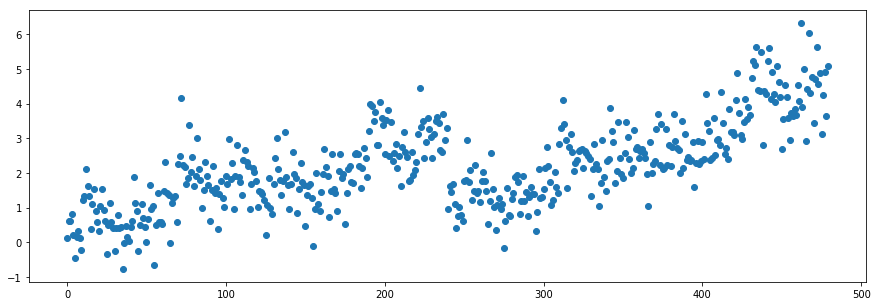

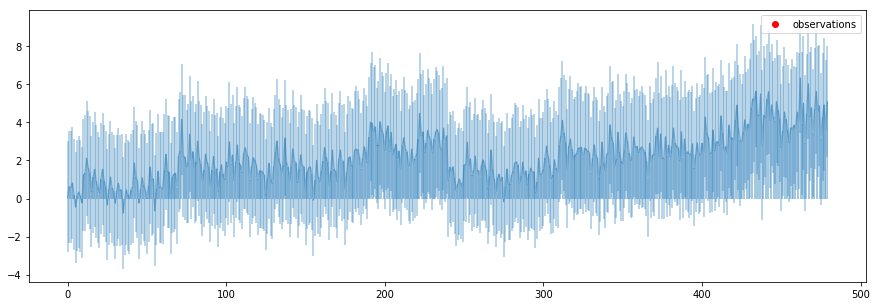

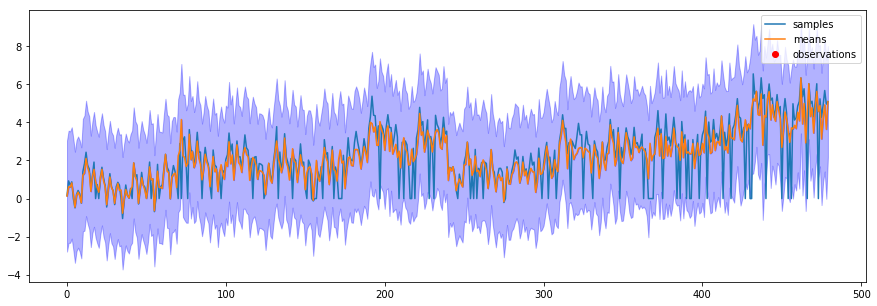

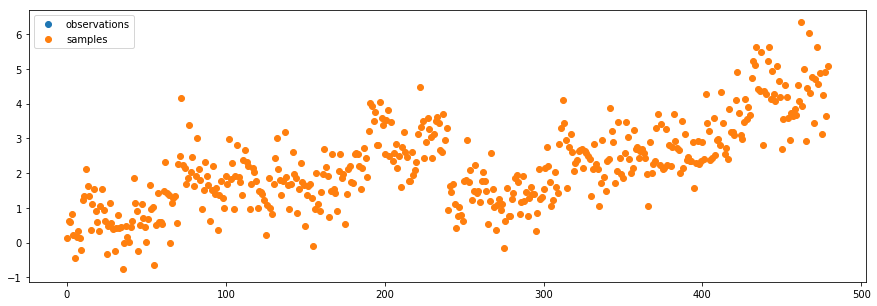

In [7]:
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 2)
new X is in there: True
new y is in there: True
mean probability is 1.0


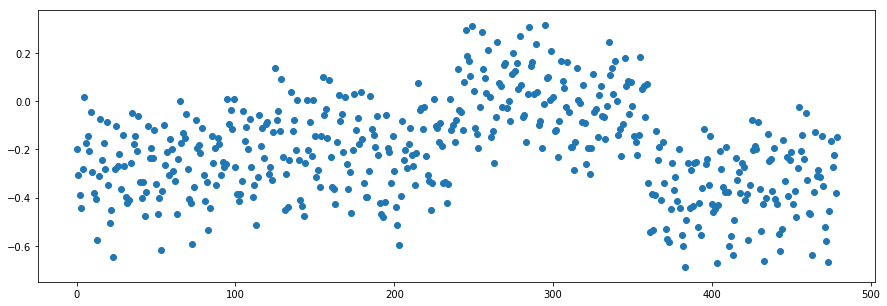

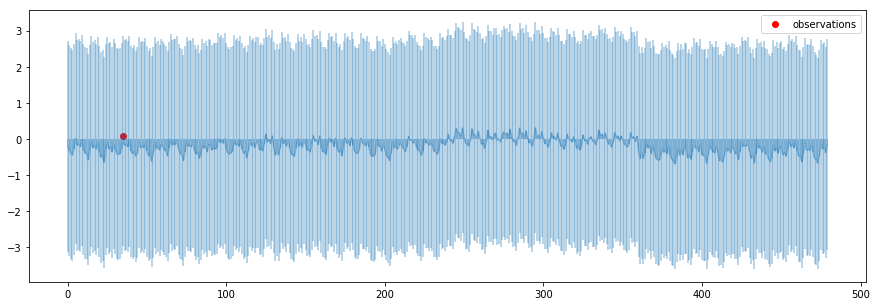

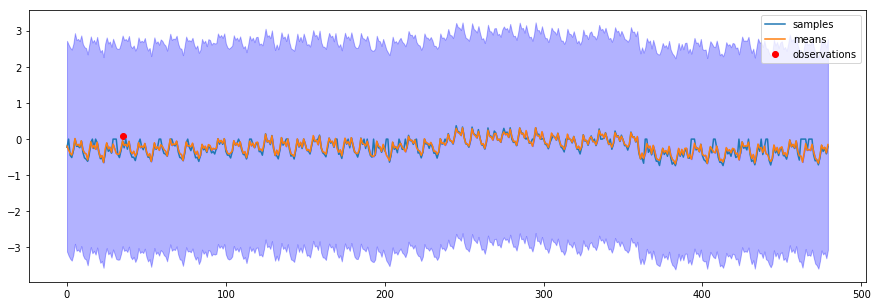

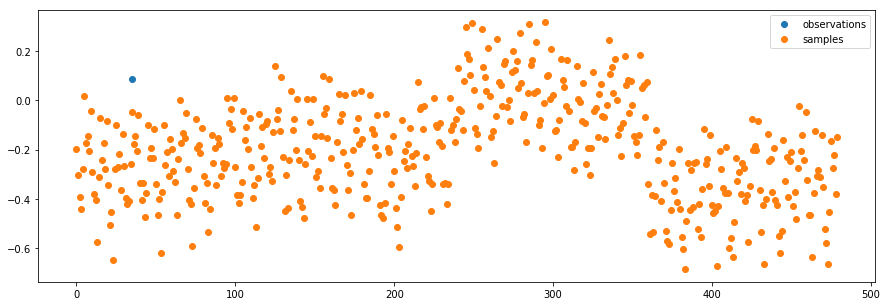

In [8]:
tg.goforit(1)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 3)
new X is in there: True
new y is in there: True
mean probability is 1.0
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 3)
new X is in there: True
new y is in there: True
mean probability is 0.75
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 4)
new X is in there: True
new y is in there: True
mean probability is 0.8
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 3)
new X is in there: True
new y is in there: True
mean probability is 0.5
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 5)
new X is in there: True
new y is in there: True
mean probability is 0.7142857142857143
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 4)
new X is in there: True
new y is in there: True
mean probability is 0.5
initialising Network <class 'b

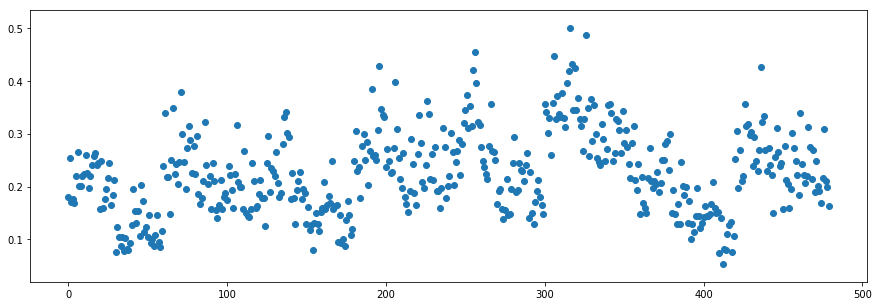

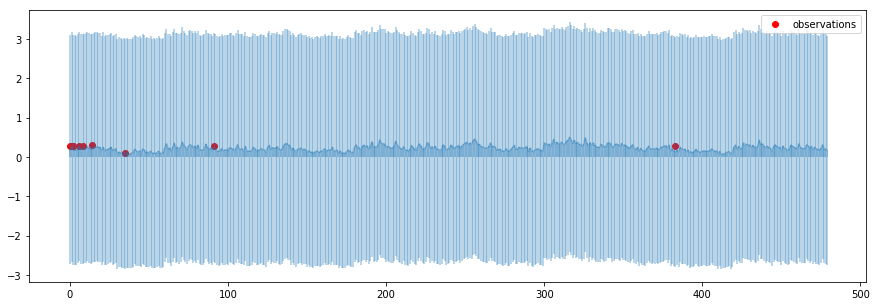

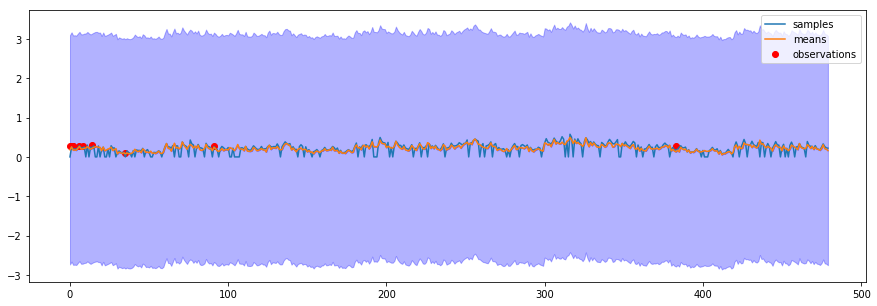

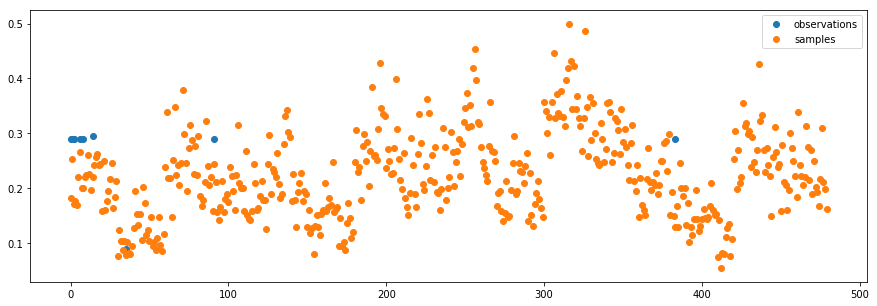

In [9]:
tg.goforit(10)
tg.plot_sample_grid()

In [10]:
tg.get_best_observation()

({'params': {'activations': [<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>,
    <function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>,
    <function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>],
   'initialisation_scheme': <function tensorflow.contrib.layers.python.layers.initializers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32)>,
   'l2': True,
   'num_neurons': [5, 10, 5],
   'optimizer': tensorflow.contrib.opt.python.training.nadam_optimizer.NadamOptimizer,
   'seed': 150},
  'score': 0.08813073459727822,
  'X': array([[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [1],
         [0],
         [1],
         [0],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0],
         [1]], dtype=uint8)},
 {'params': {'activations': [<function tensorflow.python.ops.math_ops.sigmoid(x, name=None)>,
    <function tensorflow.python.ops.math_ops.s

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 7)
new X is in there: True
new y is in there: True
mean probability is 0.5384615384615384
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 9)
new X is in there: True
new y is in there: True
mean probability is 0.6428571428571429
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 11)
new X is in there: True
new y is in there: True
mean probability is 0.7333333333333333
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 12)
new X is in there: True
new y is in there: True
mean probability is 0.75
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 10)
new X is in there: True
new y is in there: True
mean probability is 0.5882352941176471
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 9)
new X is in there: True
new y is in there: True
mean p

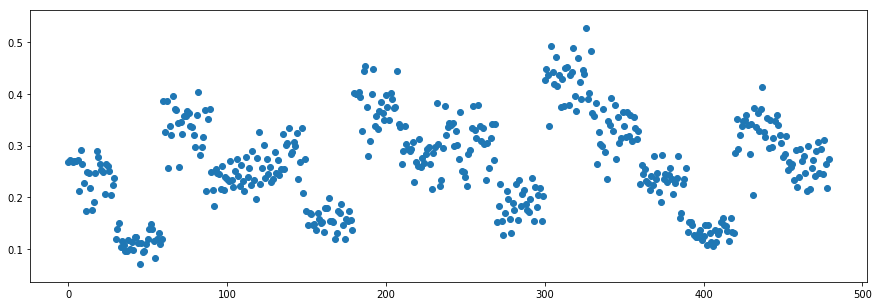

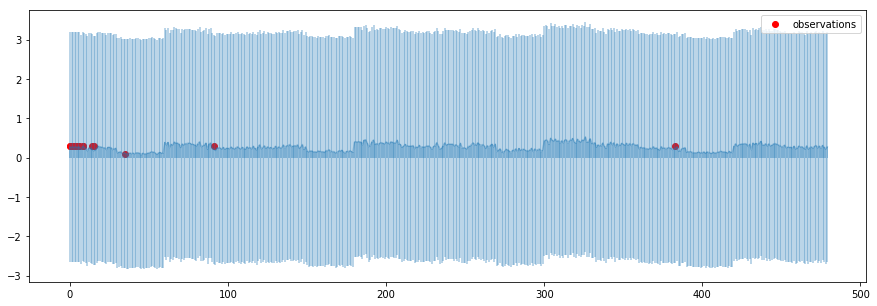

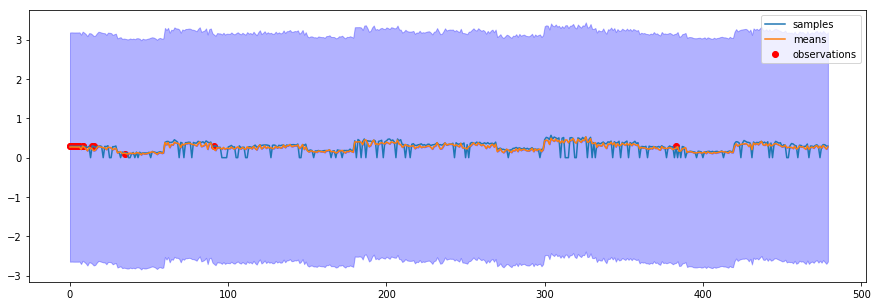

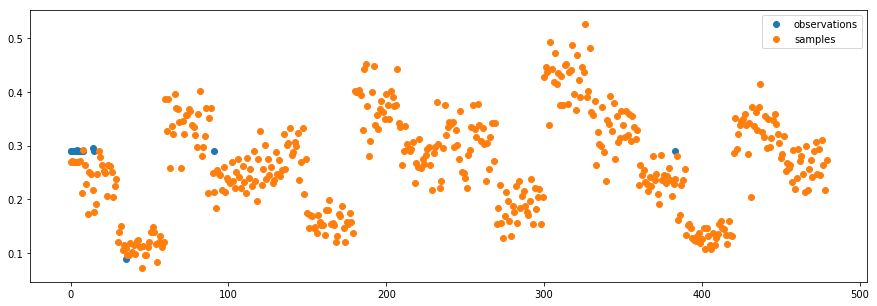

In [11]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 14)
new X is in there: True
new y is in there: True
mean probability is 0.6086956521739131
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 13)
new X is in there: True
new y is in there: True
mean probability is 0.5416666666666666
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 11)
new X is in there: True
new y is in there: True
mean probability is 0.44
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 12)
new X is in there: True
new y is in there: True
mean probability is 0.46153846153846156
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 16)
new X is in there: True
new y is in there: True
mean probability is 0.5925925925925926
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 13)
new X is in there: True
new y is in there: True
me

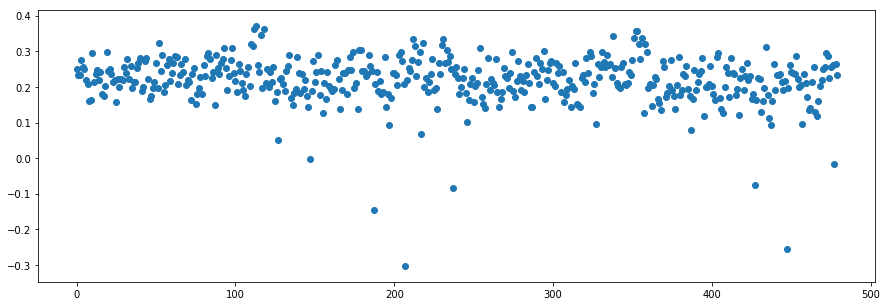

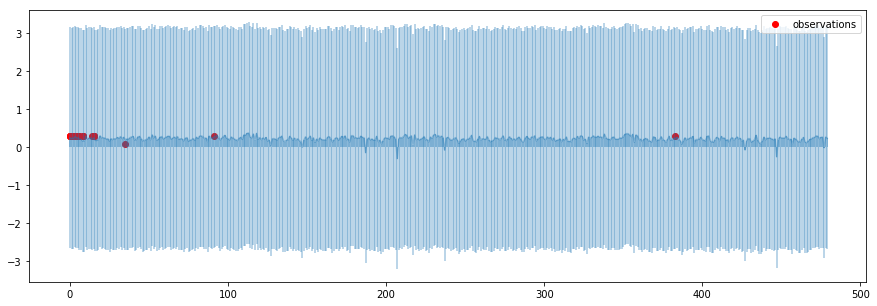

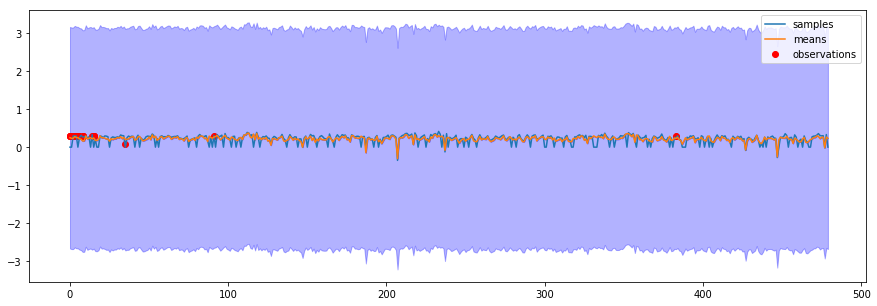

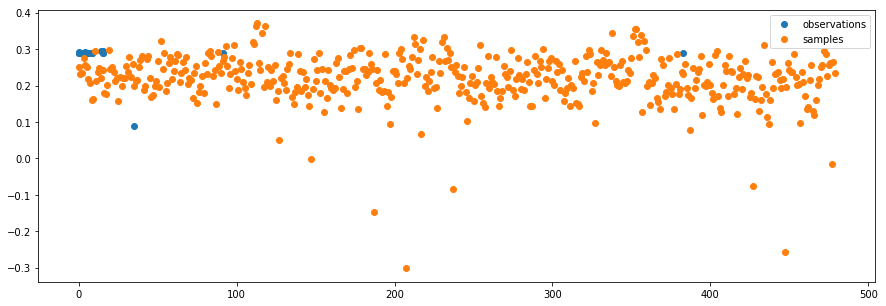

In [12]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 18)
new X is in there: True
new y is in there: True
mean probability is 0.5454545454545454
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 19)
new X is in there: True
new y is in there: True
mean probability is 0.5588235294117647
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 17)
new X is in there: True
new y is in there: True
mean probability is 0.4857142857142857
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 21)
new X is in there: True
new y is in there: True
mean probability is 0.5833333333333334
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 16)
new X is in there: True
new y is in there: True
mean probability is 0.43243243243243246
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 22)
new X is in there: True
new y is in 

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(100)
tg.plot_sample_grid()

In [ ]:
tg.get_best_observation()